In [ ]:
# For formatting the datatype and classes in them
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE


# for extracting the lexcial features from the url
from urllib.parse import urlparse
# this module is required to import tldextract
!pip install tldextract
import tldextract


# for visualization
from IPython.display import display
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt




# required for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# required for pre-processing
!pip install category_encoders
import category_encoders as ce


#for validation of all the classification models
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#For saving all the models and necessary functions
import joblib

# Machine learning models which are required
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier




ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
from google.colab import drive

In [ ]:
#Mount Google Drive to load all the datasets from the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the data of each class
dataset_benign = pd.read_csv("/content/drive/MyDrive/training_dataset.csv")
dataset_benign=dataset_benign[dataset_benign['result']==0]
dataset_benign.rename(columns={'result': 'target'}, inplace=True)
dataset_benign=dataset_benign.drop(['Unnamed: 0','label'],axis=1)


In [ ]:
dataset_XSS = pd.read_csv("/content/drive/MyDrive/XSS_urls.csv")

In [ ]:
dataset_malware = pd.read_csv("/content/drive/MyDrive/malware_urls.csv")

In [ ]:
dataset_phishing = pd.read_csv("/content/drive/MyDrive/phishing_urls.csv")

In [ ]:
dataset_spam = pd.read_csv("/content/drive/MyDrive/spam_urls.csv")

In [ ]:
#dataset of each class
dataset_benign

,url,target
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0
...,...,...
345733,https://taekwondo.wisebytes.net/,0
345734,https://www.steveconway.net/,0
345735,https://www.tkd.net/,0
345736,https://www.taekwondobible.com/,0


In [ ]:
dataset_phishing.head()

,url,target
0,http://www.marketingbyinternet.com/mo/e56508df...,1
1,https://docs.google.com/spreadsheet/viewform?f...,1
2,http://www.martin-busker.de/administrator/help...,1
3,http://www.bimabn.com/1-configurazione-support...,1
4,http://www.designeremdoces.com/components/com_...,1


In [ ]:
dataset_malware.head()

,url,target
0,http://www.824555.com/app/member/SportOption.p...,2
1,http://9779.info/%E5%84%BF%E7%AB%A5%E7%AB%8B%E...,2
2,http://9779.info/%E6%A0%91%E5%8F%B6%E7%B2%98%E...,2
3,http://9779.info/%E5%8F%A4%E4%BB%A3%E4%BA%8C%E...,2
4,http://chinacxyy.com/piccodejs-000.asp?lm2=191...,2


In [ ]:
dataset_spam.head()

,url,target
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,3
1,http://archive.salisburyjournal.co.uk/2007/3/6...,3
2,http://appbasic.jettons.co.uk/links/index.html,3
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,3
4,http://acard4u.co.uk/product_reviews.php?cPath...,3


In [ ]:
dataset_XSS.head()

,url,target
0,http://www.nwce.gov.uk/search_process.php?keyw...,4
1,http://www.manchester.gov.uk/site/scripts/goog...,4
2,http://www.ldsmissions.com/us/index.php?action...,4
3,http://education.powys.gov.uk/english/adult_ed...,4
4,http://www.northwarks.gov.uk/site/scripts/goog...,4


In [ ]:
#since each of the different classes of malacious urls are saved in different dataset
# So we check the count of each of the dataset
print('The number of rows in Benign dataset is :',dataset_benign.shape[0])
print()
print('----'*20)
print()
print('The number of rows in phishing dataset is :',dataset_phishing.shape[0])
print()
print('----'*20)
print()
print('The number of rows in malware dataset is :',dataset_malware.shape[0])
print()
print('----'*20)
print()
print('The number of rows in  spam dataset is :',dataset_spam.shape[0])
print()
print('----'*20)
print()
print('The number of rows in XSS dataset is :',dataset_XSS.shape[0])

The number of rows in Benign dataset is : 345738

--------------------------------------------------------------------------------

The number of rows in phishing dataset is : 115454

--------------------------------------------------------------------------------

The number of rows in malware dataset is : 84240

--------------------------------------------------------------------------------

The number of rows in  spam dataset is : 14673

--------------------------------------------------------------------------------

The number of rows in XSS dataset is : 13701


In [ ]:
# Now making the final dataset by combining all the datasets with different classes into one dataset

# Concatenate the DataFrames into one
dataset = pd.concat([dataset_benign, dataset_phishing, dataset_malware,dataset_spam,dataset_XSS], ignore_index=True)

# Now, combined_df contains all the rows from benign, phishing, malware , spam and XSS with columns "URL" and "Target".
dataset

,url,target
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0
...,...,...
573801,http://cf.yp.yahoo.com/about/createfeedback.ht...,4
573802,http://cruises.travel.yahoo.net/s/c/results.as...,4
573803,http://smap.mobile.yahoo.com/p/lp/ctc?num=8663...,4
573804,http://bbs.cn.yahoo.com/lady/profiles/public.p...,4


In [ ]:
# Check how many classes are their for the dataset
dataset['target'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
# Displaying the count of each of these unique target classes
label_counts=dataset['target'].value_counts()
label_counts

0    345738
1    115454
2     84240
3     14673
4     13701
Name: target, dtype: int64

In [ ]:
# Define a dictionary to map integer values to string names
category_mapping = {0: 'benign', 1: 'phishing', 2: 'malware', 3: 'spam', 4: 'XSS'}

# Create a new DataFrame with the modified "Category" column
new_df = dataset.copy()  # Create a copy of the original DataFrame
new_df['target'] = new_df['target'].replace(category_mapping)

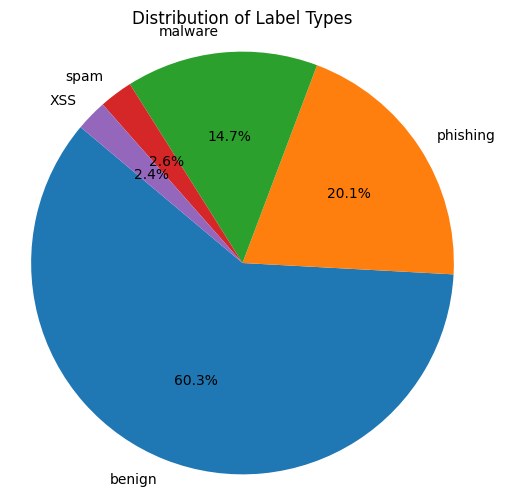

In [ ]:
label_countss=new_df['target'].value_counts()
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(label_countss, labels=label_countss.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Label Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the pie chart
plt.show()

In [ ]:
#Pre Processing step

#checking for null values and also the dtypes of all the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573806 entries, 0 to 573805
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     573806 non-null  object
 1   target  573806 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.8+ MB


In [ ]:
#input format of the dataset before pre-processing
dataset.head()

,url,target
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


In [ ]:
def extract_features(row):
    # Extract domain info using tldextract
    domain_info = tldextract.extract(row['url'])

    # Calculate scheme length
    scheme_len = len(urlparse(row['url']).scheme)

    # Calculate lengths of different URL components
    url_len = len(row['url'])
    path_len = len(urlparse(row['url']).path)
    param_len = len(urlparse(row['url']).params)
    query_len = len(urlparse(row['url']).query)
    frag_len = len(urlparse(row['url']).fragment)

    # Count specific symbols in the URL
    symbols = ['-', '@', '?', '%', '.']
    count_info = {}
    for sym in symbols:
        count_info['count' + sym] = row['url'].count(sym)

    # Count digits and alphabetic characters in the URL
    count_info['count_digit'] = sum(i.isdigit() for i in row['url'])
    count_info['count_alpha'] = sum(i.isalpha() for i in row['url'])

    # Combine all extracted features
    features = [domain_info.subdomain, domain_info.domain, domain_info.suffix,
                scheme_len, url_len, path_len, param_len, query_len, frag_len,
                count_info['count-'], count_info['count@'], count_info['count?'],
                count_info['count%'], count_info['count.'], count_info['count_digit'],
                count_info['count_alpha']]

    return features

def extract_url(data):
    # Apply the extract_features function to each row and expand the result into separate columns
    data[['subdomain', 'domain', 'suffix',
          'scheme_len', 'url_len', 'path_len', 'param_len', 'query_len', 'frag_len',
          'count-', 'count@', 'count?', 'count%', 'count.', 'count_digit', 'count_alpha']] = data.apply(extract_features, axis=1, result_type='expand')

    return data


In [ ]:
DataSet=extract_url(dataset)

In [ ]:
DataSet

,url,target,subdomain,domain,suffix,scheme_len,url_len,path_len,param_len,query_len,frag_len,count-,count@,count?,count%,count.,count_digit,count_alpha
0,https://www.google.com,0,www,google,com,5,22,0,0,0,0,0,0,0,0,2,0,17
1,https://www.youtube.com,0,www,youtube,com,5,23,0,0,0,0,0,0,0,0,2,0,18
2,https://www.facebook.com,0,www,facebook,com,5,24,0,0,0,0,0,0,0,0,2,0,19
3,https://www.baidu.com,0,www,baidu,com,5,21,0,0,0,0,0,0,0,0,2,0,16
4,https://www.wikipedia.org,0,www,wikipedia,org,5,25,0,0,0,0,0,0,0,0,2,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573801,http://cf.yp.yahoo.com/about/createfeedback.ht...,4,cf.yp,yahoo,com,4,163,26,0,114,0,6,0,1,6,4,7,117
573802,http://cruises.travel.yahoo.net/s/c/results.as...,4,cruises.travel,yahoo,net,4,146,16,0,98,0,0,0,1,6,4,8,103
573803,http://smap.mobile.yahoo.com/p/lp/ctc?num=8663...,4,smap.mobile,yahoo,com,4,120,9,0,82,0,0,0,1,8,3,27,67
573804,http://bbs.cn.yahoo.com/lady/profiles/public.p...,4,bbs.cn,yahoo,com,4,166,25,0,117,0,0,0,1,0,4,9,141


In [ ]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573806 entries, 0 to 573805
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   url          573806 non-null  object
 1   target       573806 non-null  int64 
 2   subdomain    573806 non-null  object
 3   domain       573806 non-null  object
 4   suffix       573806 non-null  object
 5   scheme_len   573806 non-null  int64 
 6   url_len      573806 non-null  int64 
 7   path_len     573806 non-null  int64 
 8   param_len    573806 non-null  int64 
 9   query_len    573806 non-null  int64 
 10  frag_len     573806 non-null  int64 
 11  count-       573806 non-null  int64 
 12  count@       573806 non-null  int64 
 13  count?       573806 non-null  int64 
 14  count%       573806 non-null  int64 
 15  count.       573806 non-null  int64 
 16  count_digit  573806 non-null  int64 
 17  count_alpha  573806 non-null  int64 
dtypes: int64(14), object(4)
memory usage: 78.8+ 

In [ ]:
grouped_data = DataSet.groupby('target')['domain'].nunique().reset_index()
grouped_data

,target,domain
0,0,87210
1,1,18473
2,2,38912
3,3,838
4,4,9613


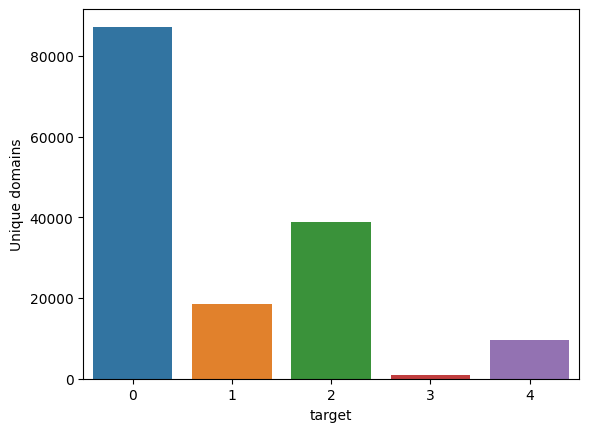

In [ ]:
import seaborn as sns
sns.barplot(data=grouped_data, x="target", y="domain")
plt.ylabel("Unique domains")
plt.show()

   target  subdomain
0       0      21332
1       1      15556
2       2       1213
3       3        388
4       4       3130


<Axes: xlabel='target', ylabel='subdomain'>

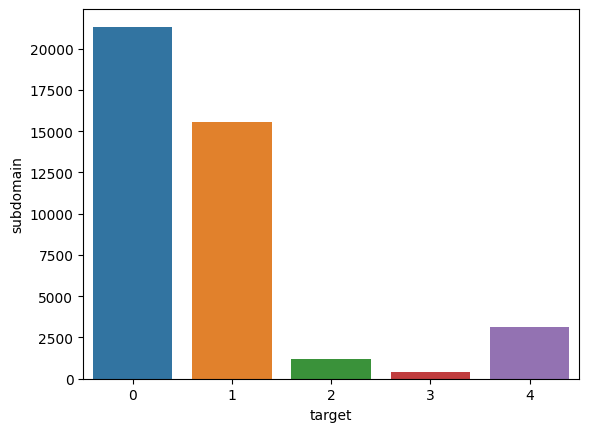

In [ ]:
grouped_data1 = DataSet.groupby('target')['subdomain'].nunique().reset_index()
print(grouped_data1)
sns.barplot(data=grouped_data1, x="target", y="subdomain")

   target  suffix
0       0     460
1       1     489
2       2     302
3       3      59
4       4     400


<Axes: xlabel='target', ylabel='suffix'>

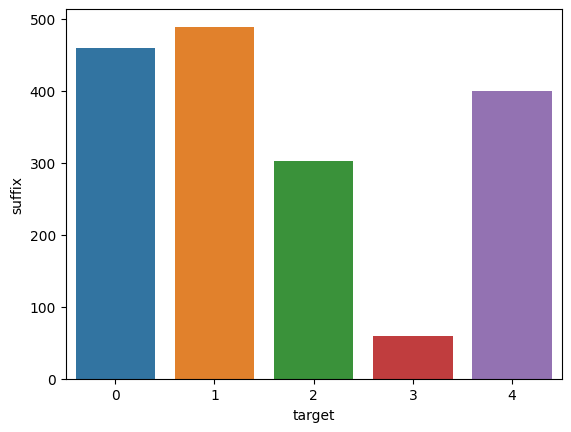

In [ ]:
grouped_data2 = DataSet.groupby('target')['suffix'].nunique().reset_index()
print(grouped_data2)
sns.barplot(data=grouped_data2, x="target", y="suffix")

In [ ]:
# Handling categorical features
count_encoder = ce.CountEncoder(handle_unknown=0)
DataSet_copy=DataSet.copy()
DataSet_copy.iloc[:, 2:6] = count_encoder.fit_transform(DataSet_copy.iloc[:, 2:6])

<ipython-input-85-0086fa34849d>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  DataSet_copy.iloc[:, 2:6] = count_encoder.fit_transform(DataSet_copy.iloc[:, 2:6])


<ipython-input-86-0cd089a1a8ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=DataSet_copy.corr()


<Axes: >

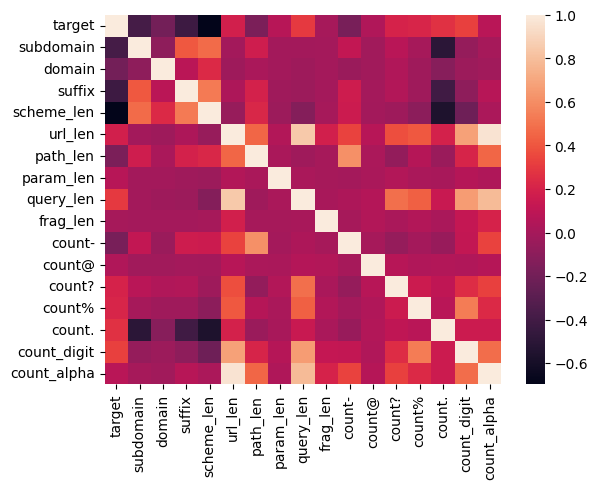

In [ ]:
correlation_matrix=DataSet_copy.corr()
sns.heatmap(correlation_matrix)

**Data Transformation**

In [ ]:
# encoding of categorical features
count_encoder = ce.CountEncoder(handle_unknown=0)
DataSet.iloc[:, 2:5] = count_encoder.fit_transform(DataSet.iloc[:, 2:5])


<ipython-input-60-0646c46beb13>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  DataSet.iloc[:, 2:5] = count_encoder.fit_transform(DataSet.iloc[:, 2:5])


In [ ]:
DataSet.head()

,url,target,subdomain,domain,suffix,scheme_len,url_len,path_len,param_len,query_len,frag_len,count-,count@,count?,count%,count.,count_digit,count_alpha
0,https://www.google.com,0,279648,3773,313469,5,22,0,0,0,0,0,0,0,0,2,0,17
1,https://www.youtube.com,0,279648,8658,313469,5,23,0,0,0,0,0,0,0,0,2,0,18
2,https://www.facebook.com,0,279648,8308,313469,5,24,0,0,0,0,0,0,0,0,2,0,19
3,https://www.baidu.com,0,279648,12,313469,5,21,0,0,0,0,0,0,0,0,2,0,16
4,https://www.wikipedia.org,0,279648,12895,41614,5,25,0,0,0,0,0,0,0,0,2,0,20


In [ ]:
#Saving the encoder in the drive to use it in another file by importing it.
#file_path1 = '/content/drive/My Drive/Model/my_encoder.pkl'
#joblib.dump(count_encoder, file_path1)

In [ ]:
# Scaling of  whole dataset
cols = DataSet.columns
scaler_x = StandardScaler()

DataSet.iloc[:, 2:] = pd.DataFrame(scaler_x.fit_transform(DataSet.iloc[:, 2:]), columns=cols[2:])

In [ ]:
DataSet.head()

,url,target,subdomain,domain,suffix,scheme_len,url_len,path_len,param_len,query_len,frag_len,count-,count@,count?,count%,count.,count_digit,count_alpha
0,https://www.google.com,0,0.989107,1.021658,0.905896,0.660127,-0.810304,-0.990978,-0.02918,-0.183353,-0.005039,-0.459262,-0.052229,-0.367001,-0.087921,-0.839779,-0.470406,-0.760709
1,https://www.youtube.com,0,0.989107,2.876004,0.905896,0.660127,-0.788964,-0.990978,-0.02918,-0.183353,-0.005039,-0.459262,-0.052229,-0.367001,-0.087921,-0.839779,-0.470406,-0.732401
2,https://www.facebook.com,0,0.989107,2.743144,0.905896,0.660127,-0.767624,-0.990978,-0.02918,-0.183353,-0.005039,-0.459262,-0.052229,-0.367001,-0.087921,-0.839779,-0.470406,-0.704094
3,https://www.baidu.com,0,0.989107,-0.406018,0.905896,0.660127,-0.831644,-0.990978,-0.02918,-0.183353,-0.005039,-0.459262,-0.052229,-0.367001,-0.087921,-0.839779,-0.470406,-0.789016
4,https://www.wikipedia.org,0,0.989107,4.484370,-1.024231,0.660127,-0.746284,-0.990978,-0.02918,-0.183353,-0.005039,-0.459262,-0.052229,-0.367001,-0.087921,-0.839779,-0.470406,-0.675787


In [ ]:
#Saving the scaler in the drive to use it in another file by importing it.
#file_path2 = '/content/drive/My Drive/Model/my_scaler.pkl'
#joblib.dump(scaler_x, file_path2)

In [ ]:
#data_to_save = DataSet

# Define the path on Google Drive where you want to save the data
#save_path = 'content/drive/My Drive/Model/DataSet1.csv'  # Change 'Your_Folder' to your desired folder

# Save the data to the specified path
#DataSet.to_csv(save_path, index=False)

**Main algorithm**

In [ ]:
# Sepearing dependent and independent varible
X = DataSet.drop(columns=['target','url'], inplace=False)
Y = DataSet.loc[:, 'target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

In [ ]:
#checking for accuracies of all the classification models using our dataset.

In [ ]:
#logistic Regression


from sklearn.metrics import accuracy_score
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, Y_train)
lr_y_pred = lr.predict(X_test)

print('Accuracy of the Logistic Regression is -->',accuracy_score(Y_test,lr_y_pred))

Accuracy of the Logistic Regression is --> 0.9173855457381364


In [ ]:
# Decision Tree

dt = DecisionTreeClassifier(random_state=14)
dt.fit(X_train, Y_train)
dt_y_pred = dt.predict(X_test)
print('Accuracy of the Decision Tree is -->',accuracy_score(Y_test,dt_y_pred))

Accuracy of the Decision Tree is --> 0.9785556194559175


In [ ]:
#Naive Bayes

nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_y_pred = nb.predict(X_test)
print('Accuracy of the Naive Bayes is -->',accuracy_score(Y_test,nb_y_pred))

Accuracy of the Naive Bayes is --> 0.7315052020703717


In [ ]:
#Stochastic Gradient descent


sgd = SGDClassifier(n_jobs=-1)
sgd.fit(X_train, Y_train)
sgd_y_pred = sgd.predict(X_test)
print('Accuracy of the Stochastic Gradient descent is -->',accuracy_score(Y_test,sgd_y_pred))

Accuracy of the Stochastic Gradient descent is --> 0.9065108659660863


In [ ]:

#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=320, verbose=1, n_jobs=-1, random_state=14)
rfc.fit(X_train, Y_train)
rfc_y_pred = rfc.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(Y_test,rfc_y_pred))

print('---'*20)
class_report = classification_report(Y_test, rfc_y_pred)

print('Classification report :')
print(class_report)


# Extract individual F1 scores for each class
f1_scores = f1_score(Y_test, rfc_y_pred, average=None)

print('---'*20)
print('Classification report  for each individual class:')
for i, f1 in enumerate(f1_scores):
    print(f"F1 Score for Class {i}: {f1}")


print('---'*20)
from sklearn.metrics import accuracy_score


print('Accuracy of the Random Forest is -->',accuracy_score(Y_test,rfc_y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  4.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done 320 out of 320 | elapsed:    7.3s finished


Confusion Matrix: 
 [[69018   122     2     9     2]
 [  351 22370   316    15    62]
 [   55   441 16345     6    18]
 [  147    70    13  2626     6]
 [   35    54     2     4  2673]]
------------------------------------------------------------
Classification report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     69153
           1       0.97      0.97      0.97     23114
           2       0.98      0.97      0.97     16865
           3       0.99      0.92      0.95      2862
           4       0.97      0.97      0.97      2768

    accuracy                           0.98    114762
   macro avg       0.98      0.96      0.97    114762
weighted avg       0.98      0.98      0.98    114762

------------------------------------------------------------
Classification report  for each individual class:
F1 Score for Class 0: 0.9947895271658054
F1 Score for Class 1: 0.9690065192436811
F1 Score for Class 2: 0.9745699549831559
F1 Sco

In [ ]:
#XG Boost
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
xgboost = xgb.XGBClassifier(objective="multi:softmax", num_class=5,random_state=14)
xgboost.fit(X_train, Y_train)
xgb_y_pred = xgboost.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(Y_test,xgb_y_pred))

print('---'*20)
class_report = classification_report(Y_test, xgb_y_pred)

print('Classification report :')
print(class_report)


# Extract individual F1 scores for each class
f1_scores = f1_score(Y_test, xgb_y_pred, average=None)

print('---'*20)
print('Classification report  for each individual class:')
for i, f1 in enumerate(f1_scores):
    print(f"F1 Score for Class {i}: {f1}")


print('---'*20)
print('Accuracy of the XGBoost is -->',accuracy_score(Y_test,xgb_y_pred))

Confusion Matrix: 
 [[69036   100     4     8     5]
 [  355 22193   501    16    49]
 [   60   521 16259     3    22]
 [  144    77    15  2625     1]
 [   17    39     9     2  2701]]
------------------------------------------------------------
Classification report :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     69153
           1       0.97      0.96      0.96     23114
           2       0.97      0.96      0.97     16865
           3       0.99      0.92      0.95      2862
           4       0.97      0.98      0.97      2768

    accuracy                           0.98    114762
   macro avg       0.98      0.96      0.97    114762
weighted avg       0.98      0.98      0.98    114762

------------------------------------------------------------
Classification report  for each individual class:
F1 Score for Class 0: 0.9950059453032104
F1 Score for Class 1: 0.9639909651637564
F1 Score for Class 2: 0.9662734377321488
F1 Sco

In [ ]:
# Create a VotingClassifier with soft voting
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
voting_classifier = VotingClassifier(estimators=[('RandomForest',rfc),('XGboost',xgboost)],voting='soft')
voting_classifier.fit(X_train, Y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  5.2min finished


VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(n_estimators=320,
                                                     n_jobs=-1, random_state=14,
                                                     verbose=1)),
                             ('XGboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_ty...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_class=5, num_parallel_tree=None, ...))],
                 voting='soft')

In [ ]:
voting_classifier.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 320 out of 320 | elapsed:   13.2s finished


array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
voting_y_pred = voting_classifier.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(Y_test,voting_y_pred))

print('---'*20)
class_report = classification_report(Y_test, voting_y_pred)

print('Classification report :')
print(class_report)


# Extract individual F1 scores for each class
f1_scores = f1_score(Y_test, voting_y_pred, average=None)

print('---'*20)
print('Classification report  for each individual class:')
for i, f1 in enumerate(f1_scores):
    print(f"F1 Score for Class {i}: {f1}")


print('---'*20)
print('Accuracy of the ensemble is -->',accuracy_score(Y_test,voting_y_pred))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    8.0s
[Parallel(n_jobs=2)]: Done 320 out of 320 | elapsed:   11.1s finished


Confusion Matrix: 
 [[69044   100     2     4     3]
 [  332 22342   378     7    55]
 [   59   447 16334     4    21]
 [  142    73    13  2631     3]
 [   24    44     8     2  2690]]
------------------------------------------------------------
Classification report :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     69153
           1       0.97      0.97      0.97     23114
           2       0.98      0.97      0.97     16865
           3       0.99      0.92      0.95      2862
           4       0.97      0.97      0.97      2768

    accuracy                           0.99    114762
   macro avg       0.98      0.96      0.97    114762
weighted avg       0.98      0.99      0.98    114762

------------------------------------------------------------
Classification report  for each individual class:
F1 Score for Class 0: 0.9952001383743893
F1 Score for Class 1: 0.9688638334778839
F1 Score for Class 2: 0.9722619047619048
F1 Sco

In [ ]:

# Random Forest
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=73)


# Create a Random Forest classifier with 350 trees, SMOTE, and balanced class weights
#model = RandomForestClassifier(n_estimators=300, random_state=73,criterion='entropy',max_depth=30 ,class_weight='balanced',max_features = 0.5)

# Train the model on the resampled training data
#model.fit(X_train, y_train)

# Make predictions on the training data
#y_train_pred = model.predict(X_train)

# Calculate training accuracy
#train_accuracy = accuracy_score(y_train, y_train_pred)

# Generate the training classification report
#train_report = classification_report(y_train, y_train_pred)

# Make predictions on the test data
#y_test_pred = model.predict(X_test)

# Calculate testing accuracy
#test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate the testing classification report
#test_report = classification_report(y_test, y_test_pred)

# Print the training and testing accuracy and classification reports
#print("Training Accuracy:", train_accuracy)
#print("Training Classification Report:")
#print(train_report)

#print("Testing Accuracy:", test_accuracy)
#print("Testing Classification Report:")
#print(test_report)

Training Accuracy: 0.9981635747335768
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276844
           1       1.00      1.00      1.00     92414
           2       1.00      1.00      1.00     67117
           3       0.98      0.99      0.99     11726
           4       1.00      1.00      1.00     10943

    accuracy                           1.00    459044
   macro avg       0.99      1.00      1.00    459044
weighted avg       1.00      1.00      1.00    459044

Testing Accuracy: 0.9856049911991774
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     68894
           1       0.97      0.97      0.97     23040
           2       0.98      0.97      0.98     17123
           3       0.97      0.93      0.95      2947
           4       0.98      0.96      0.97      2758

    accuracy                           0.99    

In [ ]:
# XGboost
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=77)

# Create an XGBoost classifier with 'multi:softprob' objective

##xgb_classifier = XGBClassifier(objective='multi:softprob', num_class=5,random_state=77,n_estimators=700,learning_rate=0.35 ,max_depth=7,min_child_weight =1,class_weight='balanced')

# Train the model
#xgb_classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
#y_pred_prob = xgb_classifier.predict_proba(X_test)

# Convert probabilities to class predictions
#y_test_pred = np.argmax(y_pred_prob, axis=1)

# Make predictions on the training data
#y_train_pred = model.predict(X_train)

# Calculate training accuracy
#train_accuracy = accuracy_score(y_train, y_train_pred)

# Generate the training classification report
#train_report = classification_report(y_train, y_train_pred)


# Calculate testing accuracy
#test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate the testing classification report
#test_report = classification_report(y_test, y_test_pred)

# Print the training and testing accuracy and classification reports
##print("Training Accuracy:", train_accuracy)
#print("Training Classification Report:")
#print(train_report)

#print("Testing Accuracy:", test_accuracy)
#print("Testing Classification Report:")
#print("Testing Accuracy:", test_accuracy)
#print("Testing Classification Report:")
#print(test_report)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.995606085691132
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276458
           1       0.99      0.99      0.99     92259
           2       1.00      0.99      0.99     67692
           3       0.98      0.98      0.98     11712
           4       1.00      0.99      0.99     10923

    accuracy                           1.00    459044
   macro avg       0.99      0.99      0.99    459044
weighted avg       1.00      1.00      1.00    459044

Testing Accuracy: 0.9871298861992646
Testing Classification Report:
Testing Accuracy: 0.9871298861992646
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     69280
           1       0.97      0.97      0.97     23195
           2       0.98      0.97      0.98     16548
           3       0.98      0.93      0.96      2961
           4       0.98      0.97  

In [ ]:
#Save the model to a file
#Define the file path on your Google Drive
#file_path3 = '/content/drive/My Drive/Model/my_ensemble.pkl'
#joblib.dump(ensemble_classifier, file_path3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have X_train, X_test, y_train, y_test defined


X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=77)

# Base Model 1: Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=73,
    criterion='entropy',
    max_depth=30,
    class_weight='balanced',
    max_features=0.5
)

rf_model.fit(X, Y)


# Base Model 2: XGBoost
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=5,
    random_state=77,
    n_estimators=700,
    learning_rate=0.35,
    max_depth=7,
    min_child_weight=1,
    class_weight='balanced'
)

xgb_model.fit(X,Y)

# Create a VotingClassifier with soft voting
voting_classifier = VotingClassifier(
    estimators=[
        ('RandomForest', rf_model),
        ('XGBoost', xgb_model)
    ],
    voting='soft'
)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:08:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
voting_classifier_final = voting_classifier.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:18:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
file_path3 = '/content/drive/My Drive/Model/my_ensemble.pkl'
joblib.dump(voting_classifier_final , file_path3)

['/content/drive/My Drive/Model/my_ensemble.pkl']

In [ ]:
# Make predictions using the ensemble classifier
y_pred_final = voting_classifier.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print('---'*20)
class_report = classification_report(y_test, y_pred)

print('Classification report :')
print(class_report)


# Extract individual F1 scores for each class
f1_scores = f1_score(y_test, y_pred, average=None)

print('---'*20)
print('Classification report  for each individual class:')
for i, f1 in enumerate(f1_scores):
    print(f"F1 Score for Class {i}: {f1}")


print('---'*20)

print('Accuracy of the Ensemble is -->',accuracy_score(y_test,y_pred))

Confusion Matrix: 
 [[69131   116     4    27     2]
 [  283 22587   267    24    34]
 [   49   358 16120    12     9]
 [  120    74    13  2752     2]
 [   23    49     5     0  2701]]
------------------------------------------------------------
Classification report :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     69280
           1       0.97      0.97      0.97     23195
           2       0.98      0.97      0.98     16548
           3       0.98      0.93      0.95      2961
           4       0.98      0.97      0.98      2778

    accuracy                           0.99    114762
   macro avg       0.98      0.97      0.98    114762
weighted avg       0.99      0.99      0.99    114762

------------------------------------------------------------
Classification report  for each individual class:
F1 Score for Class 0: 0.9955071065478162
F1 Score for Class 1: 0.9740184135061127
F1 Score for Class 2: 0.9782443790393544
F1 Sco